In [1]:
from sklearn.datasets import fetch_openml

from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml("mnist_784",as_frame = False)

X,y = mnist.data,mnist.target

In [3]:
print(X.shape,y.shape)

(70000, 784) (70000,)


In [4]:
def plot_dig(digit):
    image = digit.reshape(28,28)
    plt.imshow(image)
    

'4'

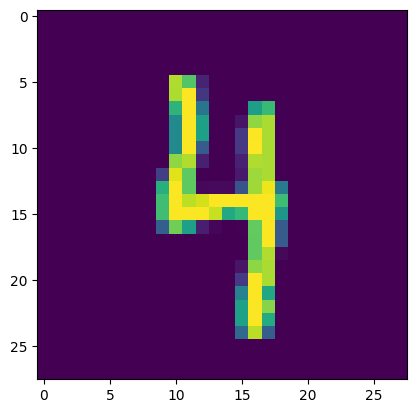

In [5]:
plot_dig(X[1110])
y[1110]

In [6]:
x_train,x_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [7]:
test_5 = (y_train == "5")

print(test_5.shape, x_train.shape)

(60000,) (60000, 784)


In [8]:
sgd_model = SGDClassifier(random_state=42)

In [9]:
sgd_model.fit(x_train,test_5)

SGDClassifier(random_state=42)

In [10]:
sgd_model.predict([X[80]])


array([False])

In [11]:
cross_val_score(sgd_model,x_train,test_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [12]:
dummy_model = DummyClassifier()
dummy_model.fit(x_train,y_train)

DummyClassifier()

In [13]:
cross_val_score(sgd_model,x_train,test_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [14]:
cross_val_score(dummy_model,x_train,test_5,cv=3,scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [17]:
pred = cross_val_predict(sgd_model,x_train,test_5,cv=3)
pred

array([ True, False, False, ...,  True, False, False])

In [18]:
con_matrix = confusion_matrix(pred,test_5)
con_matrix

array([[53892,  1891],
       [  687,  3530]], dtype=int64)